In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf

In [2]:
data=pd.read_csv('./ChessKnight.csv').values
data=np.unique(data,axis=0)
len_all=len(data)
permu=np.random.permutation(len_all)
data=data[permu]

In [3]:
x_all=np.zeros((len_all,12,12,4))
index=((np.tile(np.arange(len_all),4)),(np.concatenate([data[:,0],data[:,2],data[:,4],data[:,6]])),(np.concatenate([data[:,1],data[:,3],data[:,5],data[:,7]])),(np.concatenate([np.full(len_all,0),np.full(len_all,1),np.full(len_all,2),np.full(len_all,3)])))
x_all[index]=1.

t_all=data[:,8]
t_all=np.eye(t_all.max()+1)[t_all]

In [4]:
cuts=(0.7,0.85)
x_train=x_all[:int(cuts[0]*len_all)]
t_train=t_all[:int(cuts[0]*len_all)]
x_val=x_all[int(cuts[0]*len_all):int(cuts[1]*len_all)]
t_val=t_all[int(cuts[0]*len_all):int(cuts[1]*len_all)]
x_test=x_all[int(cuts[1]*len_all):]
t_test=t_all[int(cuts[1]*len_all):]
(np.abs(np.full(len(t_test),data[:,8].mean())-t_test.argmax(axis=1))<=2).sum()/len(t_test)

0.3589695700316173

In [5]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,input_shape=x_all.shape[1:],activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(t_all.shape[1],activation='softmax'))

In [6]:
model.compile(tf.keras.optimizers.Adam(0.001),
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=[tf.keras.losses.CategoricalCrossentropy()])

In [7]:
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='categorical_crossentropy')

In [8]:
history=model.fit(x_train,t_train,epochs=10,batch_size=100,validation_data=(x_val,t_val))

Epoch 1/10
3499/3499 [==============================] - 47s 13ms/step - loss: 2.0747 - categorical_crossentropy: 2.0747 - val_loss: 1.8843 - val_categorical_crossentropy: 1.8844
Epoch 2/10
3499/3499 [==============================] - 60s 17ms/step - loss: 1.7582 - categorical_crossentropy: 1.7582 - val_loss: 1.6798 - val_categorical_crossentropy: 1.6799
Epoch 3/10
3499/3499 [==============================] - 80s 23ms/step - loss: 1.5222 - categorical_crossentropy: 1.5221 - val_loss: 1.4307 - val_categorical_crossentropy: 1.4307
Epoch 4/10
3499/3499 [==============================] - 73s 21ms/step - loss: 1.3017 - categorical_crossentropy: 1.3018 - val_loss: 1.2572 - val_categorical_crossentropy: 1.2573
Epoch 5/10
3499/3499 [==============================] - 64s 18ms/step - loss: 1.1462 - categorical_crossentropy: 1.1461 - val_loss: 1.1322 - val_categorical_crossentropy: 1.1322
Epoch 6/10
3499/3499 [==============================] - 61s 17ms/step - loss: 1.0436 - categorical_crossentrop

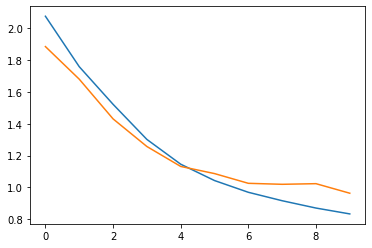

In [9]:
maximum=0
plt.plot(history.history['loss'][maximum:])
plt.plot(history.history['val_loss'][maximum:])

In [10]:
predicted_pre=model.predict(x_test)
predicted=predicted_pre.argmax(axis=1)
predicted

array([26, 24, 23, ..., 16, 25, 24])

In [11]:
t_test.argmax(axis=1)

array([27, 24, 24, ..., 16, 25, 24])

In [14]:
(np.abs(predicted-t_test.argmax(axis=1))<=1).sum()/len(t_test)

0.9735722194799824

In [13]:
dict(zip(list(np.unique(predicted-t_test.argmax(axis=1),return_counts=True)[0]),list(np.unique(predicted-t_test.argmax(axis=1),return_counts=True)[1])))

{-15: 1,
 -12: 1,
 -8: 4,
 -7: 5,
 -6: 6,
 -5: 3,
 -4: 6,
 -3: 55,
 -2: 625,
 -1: 12323,
 0: 43643,
 1: 17012,
 2: 1126,
 3: 108,
 4: 29,
 5: 5,
 6: 3,
 7: 3,
 10: 1}

In [15]:
model.save('model (CNN,4).h5')